In [5]:
import pandas as pd
import matplotlib.pyplot as mp
df = pd.read_excel('Portfolio-by-School-Type.xls')
df

,Federal Student Loan Portfolio by School Type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Includes outstanding principal and interest ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Source: Enterprise Data Warehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Public,NaN,Private,NaN,Proprietary,NaN,Foreign,NaN,Other,NaN
4,Federal Fiscal Year,NaN,Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions)
5,2017,Q2,563.8,23.9,434.7,12.8,221.6,11.7,13.5,0.1,106.9,9
6,2017,Q3,561.7,23.6,435,12.7,224.2,11.7,13.7,0.1,107.5,9
7,2017,Q4,581.1,24.3,451.7,13.3,242.9,12.3,14.2,0.1,82.1,7.9
8,2018,Q1,582.7,24.4,454.7,13.3,244.9,12.4,14.3,0.1,85.1,7.9
9,2018,Q2,597.5,24.4,466.2,13.3,248.4,12.4,14.8,0.1,84.2,7.8


In [6]:
df = df.drop([0, 1, 2, 3, 32, 33, 34, 35])
new_row = {"Federal Student Loan Portfolio by School Type": 0, "Unnamed: 1": '', "Unnamed: 2": 0, "Unnamed: 3" : 0, "Unnamed: 4": 0, "Unnamed: 5": 0, "Unnamed: 6" : 0, "Unnamed: 7": 0, "Unnamed: 8": 0, "Unnamed: 9" : 0, "Unnamed: 10": 0, "Unnamed: 11" : 0}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df.rename(columns={"Unnamed: 1": "Quarter", "Unnamed: 2" : "Public inst.", "Unnamed: 3": "Public insts.", "Unnamed: 4" : "Private inst.", "Unnamed: 5" : "Private insts.", "Unnamed: 6" : "Proprietary inst.", "Unnamed: 7": "Proprietary insts.", "Unnamed: 8" : "Foreign inst.", "Unnamed: 9": "Foreign insts.", "Unnamed: 10" : "Other inst.", "Unnamed: 11": "Other insts."}, inplace=True)
df

,Federal Student Loan Portfolio by School Type,Quarter,Public inst.,Public insts.,Private inst.,Private insts.,Proprietary inst.,Proprietary insts.,Foreign inst.,Foreign insts.,Other inst.,Other insts.
0,Federal Fiscal Year,NaN,Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions),Dollars Outstanding (in billions),Recipients (in millions)
1,2017,Q2,563.8,23.9,434.7,12.8,221.6,11.7,13.5,0.1,106.9,9
2,2017,Q3,561.7,23.6,435,12.7,224.2,11.7,13.7,0.1,107.5,9
3,2017,Q4,581.1,24.3,451.7,13.3,242.9,12.3,14.2,0.1,82.1,7.9
4,2018,Q1,582.7,24.4,454.7,13.3,244.9,12.4,14.3,0.1,85.1,7.9
5,2018,Q2,597.5,24.4,466.2,13.3,248.4,12.4,14.8,0.1,84.2,7.8
6,2018,Q3,596.5,24.1,467.6,13.2,251.1,12.4,15.1,0.1,86.3,7.8
7,2018,Q4,617.6,24.9,478.5,13.5,245.6,12.2,15.5,0.1,88.2,7.9
8,2019,Q1,619.6,24.9,480.4,13.5,248.6,12.3,15.7,0.1,90.4,7.9
9,2019,Q2,630.2,24.8,489.5,13.4,249.3,12.3,16.2,0.1,95.6,10.3


In [7]:
flag = 2017
temp_master = df.iloc[28, :]
count = 0

temp = temp_master
for i in range(1, len(df)):
    if(flag == df.iloc[i, 0]):
        temp = temp.add(df.iloc[i, :])
        count = count + 1
        if(flag == 2023 and count == 4):
            temp = temp.add(df.iloc[i, :])
    else:
        df = pd.concat([df, pd.DataFrame([temp])], ignore_index=True)
        temp = temp_master
        temp = temp.add(df.iloc[i, :])
        count = 0
        flag = df.iloc[i, 0]


<Axes: xlabel='Years', ylabel='Number of borrowers (in Millions)'>

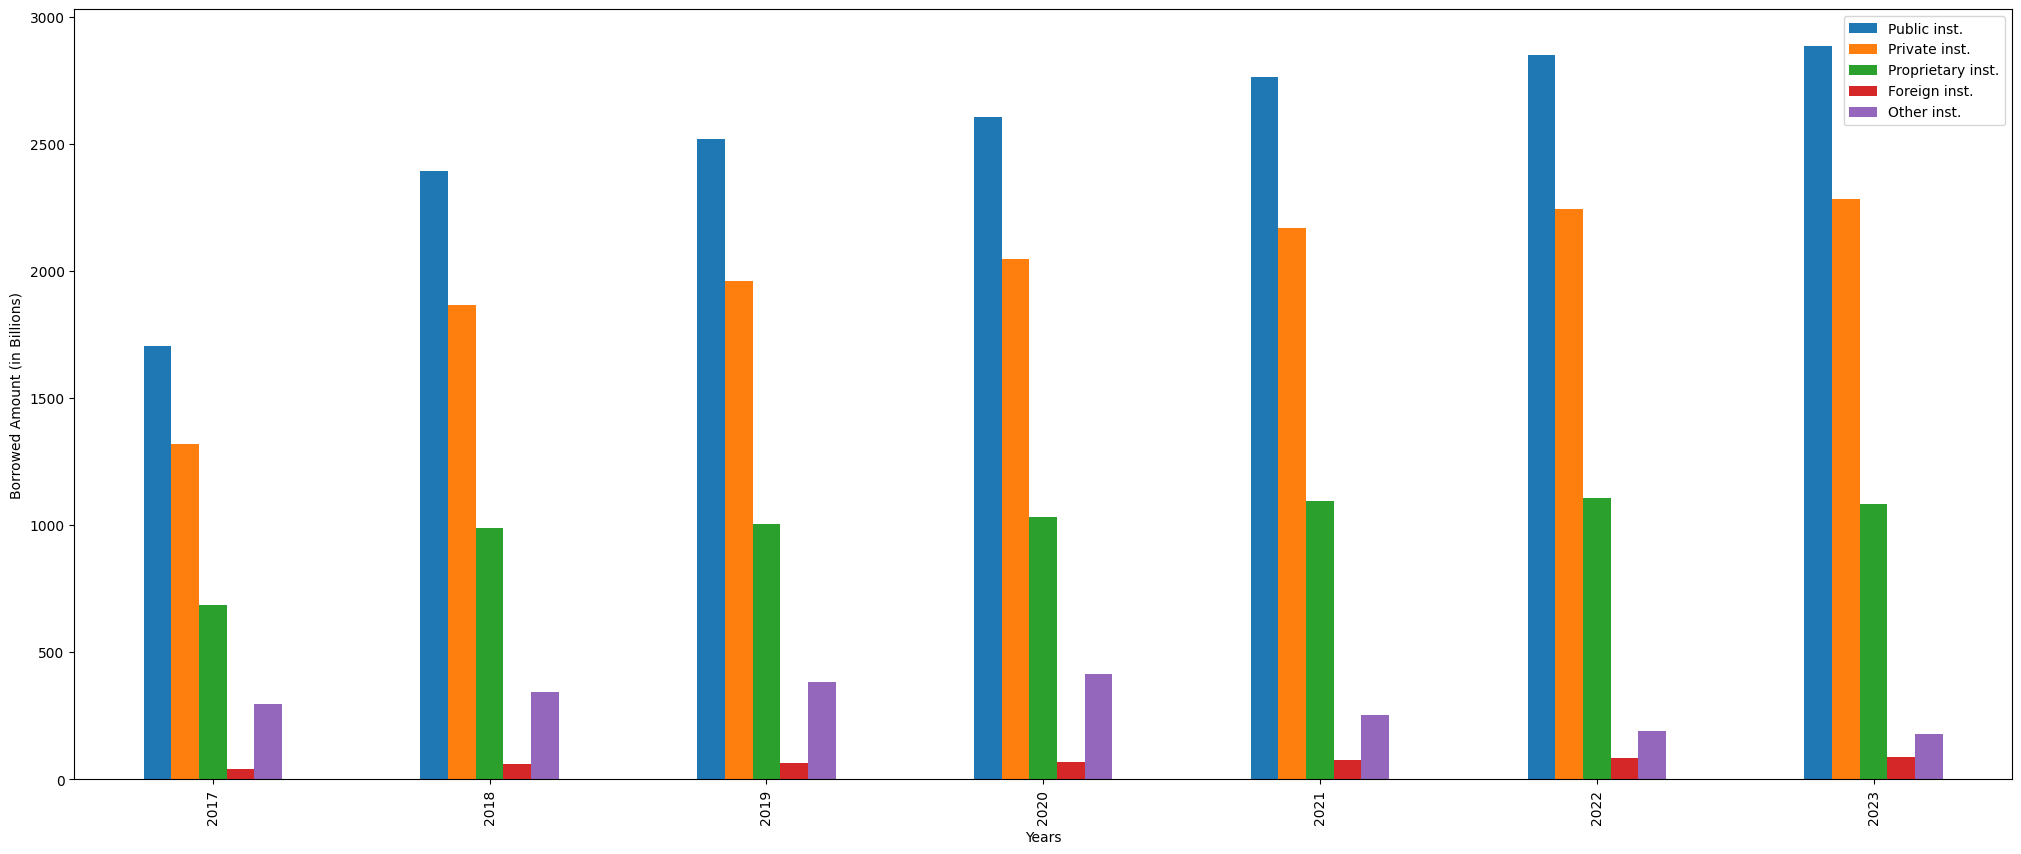

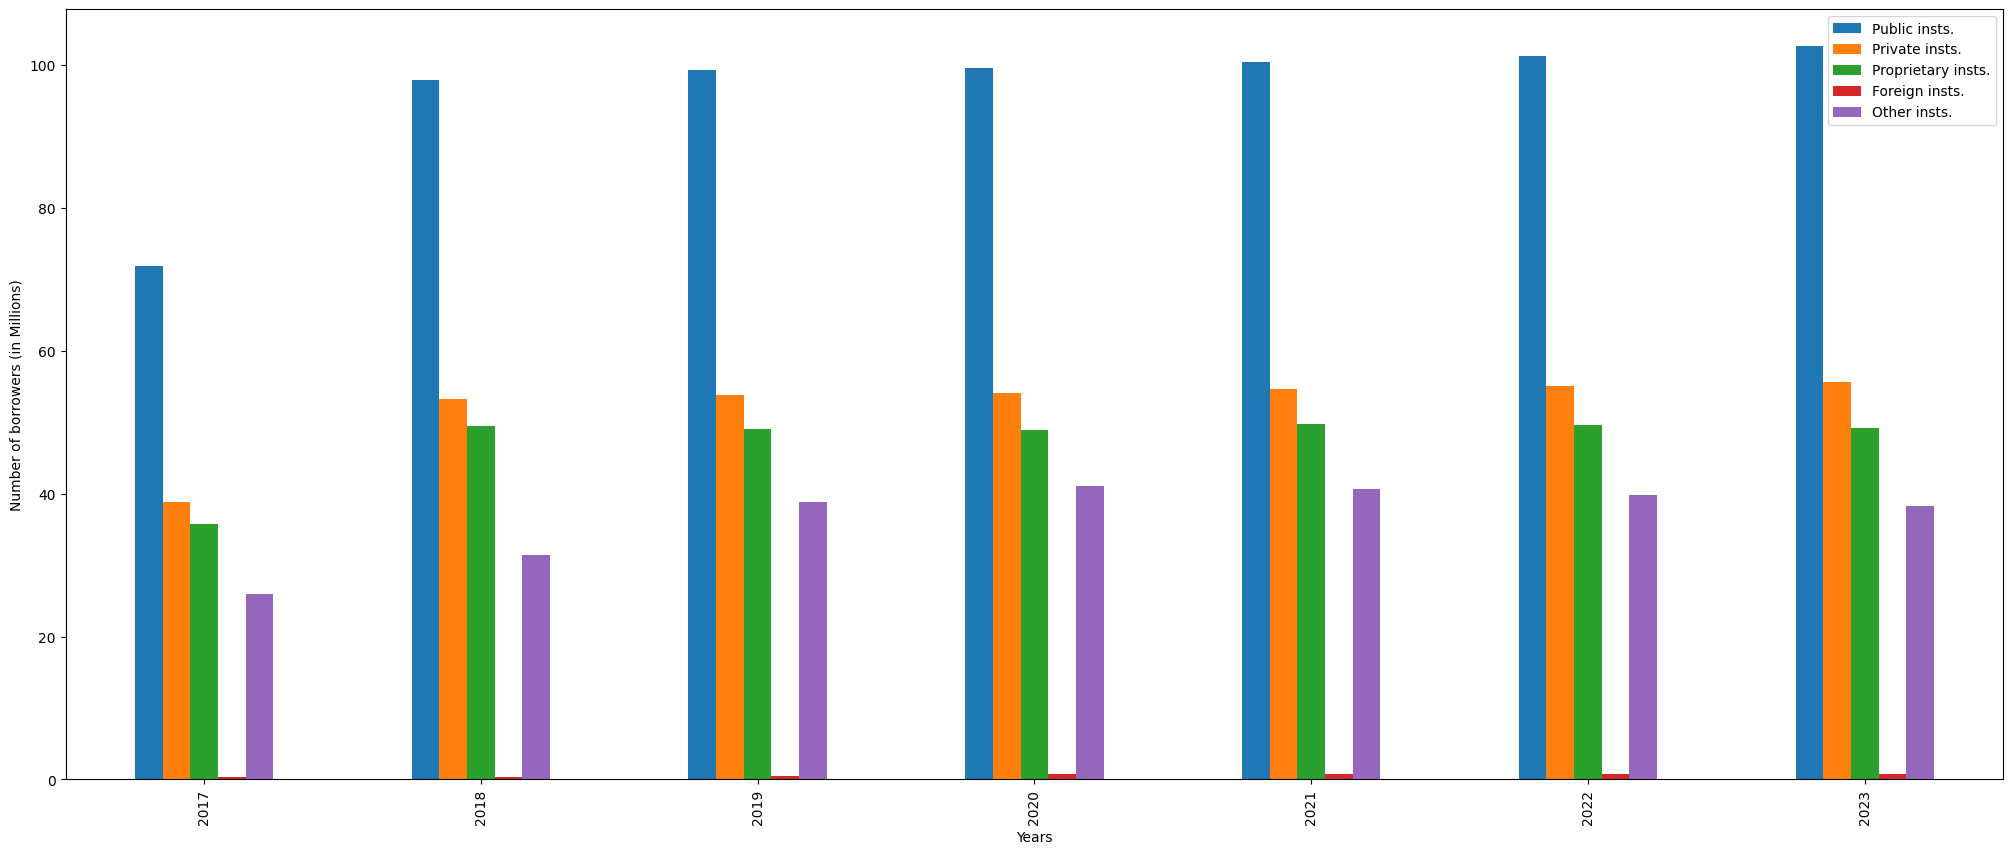

In [8]:
df2 = df.iloc[29:36, :]
school_type = pd.DataFrame(df2)

for i in range(0, len(school_type)):
    if(i != 0):
        school_type.iloc[i, 0] = int(school_type.iloc[i, 0]/4)
    else:
        school_type.iloc[i, 0] = int(school_type.iloc[i, 0]/3)

amount_borrowed_df = school_type.loc[:, ['Federal Student Loan Portfolio by School Type', 'Public inst.', 'Private inst.', 'Proprietary inst.', 'Foreign inst.', 'Other inst.']]
amount_borrowed_df.plot.bar(x = 'Federal Student Loan Portfolio by School Type', y = ['Public inst.', 'Private inst.', 'Proprietary inst.', 'Foreign inst.', 'Other inst.'], figsize=(25, 10), xlabel="Years", ylabel="Borrowed Amount (in Billions)")

num_students_df = school_type.loc[:, ['Federal Student Loan Portfolio by School Type', 'Public insts.', 'Private insts.', 'Proprietary insts.', 'Foreign insts.', 'Other insts.']]
num_students_df.plot.bar(x = 'Federal Student Loan Portfolio by School Type', y = ['Public insts.', 'Private insts.', 'Proprietary insts.', 'Foreign insts.', 'Other insts.'], figsize=(25, 10), xlabel="Years", ylabel="Number of borrowers (in Millions)")
